In [136]:
pip install ydata-profiling --silent
pip install yellowbrick --silent

SyntaxError: invalid syntax (4288644.py, line 1)

### Importing Libraries


In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings

from scipy.stats import norm
from scipy.stats.mstats import trim

from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from pandas_profiling import ProfileReport

### Loading Dataset

In [ ]:
df = pd.read_csv("winequality.csv")
df.head(15)

In [ ]:
df.info()

### Filling missing values

In [137]:
df_mean["quality_class"] = df_mean['quality_class'].map({'high': 1, 'low': 0})


In [138]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

In [139]:
fill_list = (null_cell(df)).index

df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

### Dataset Report

In [140]:
ProfileReport(df_mean, title='Wine Quality Dataset Report', minimal=True, progress_bar=False, samples=None,
              correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}},
              html={'style':{'primary_color': '#45658F'}},
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

### Correlation Matrix

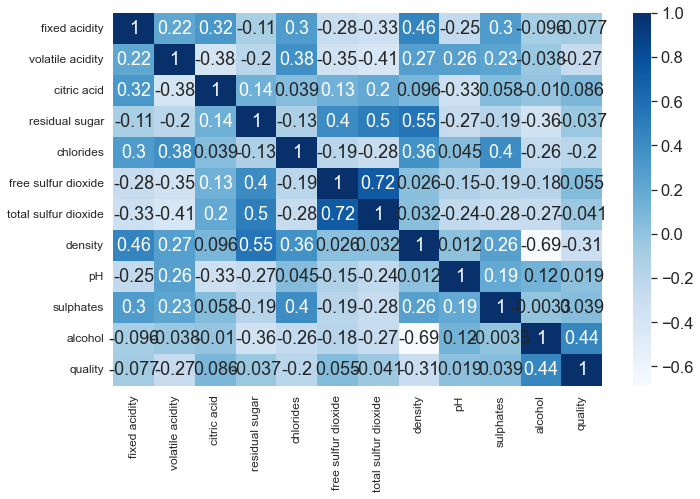

In [141]:
plt.figure(figsize=(10.5, 7.5))
sns.heatmap(df_mean.corr(), annot=True, cmap='Blues')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

- <b>Wine Quality</b> has the <b>highest correlation</b> with <b>Alcohol</b>. <br>
- Whereas it has very low relation degrees with other factors. <br> 
- It also has a low <b>negative correlation</b> with <b>Density, Volatile Acidity, Chlorides, total_sulfur_oxide and residual sugar</b> <br>


### Variable Distribution

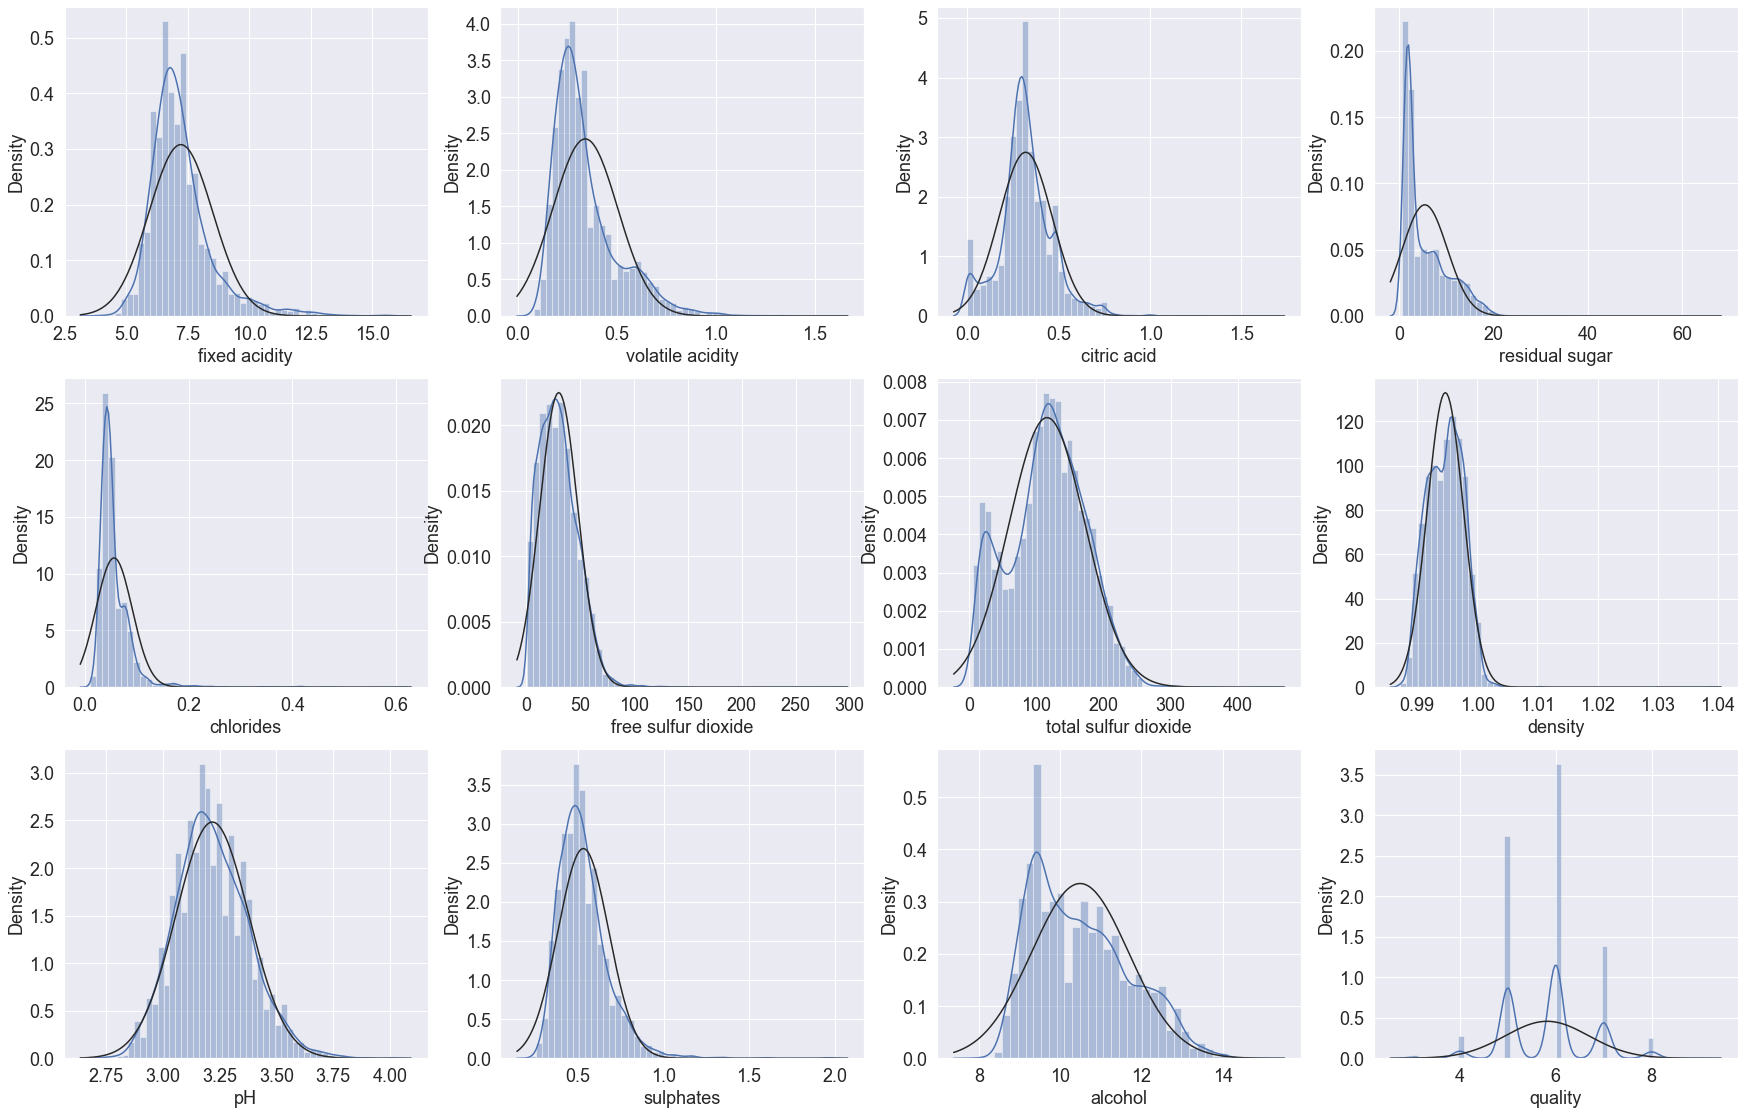

In [142]:
plt.figure(figsize =(30,33))
sns.set(font_scale=1.5)
for i in range(1,13):
    plt.subplot(5,4,i)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)

### Dataset Binning

In [143]:
df_mean['quality_class'] = ['low' if x <= 5 else 'high' for x in df['quality']]
df_mean["quality_class"] = df_mean['quality_class'].map({'high': 1, 'low': 0})
df_mean

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  quality_class  
0      0.450000      8.8        6              1  
1      0.490000      9.5        6              1  
2      0.440000     10.1        6              1  
3      0.400000      9.9        6              1  
4      0.400000      9.9        6              1  
...         ...      ...      ...            ...  
6492   0.580000     10.5        5              0  
6493   0.531215     11.2        6              1  
6494   0.750000     11.0        6              1  
6495   0.710000     10.2        5              0  
6496   0.660000     11.0        6              1  

[6497 rows x 14 columns]

### Wine Type and their Qualities

<AxesSubplot: xlabel='type', ylabel='count'>

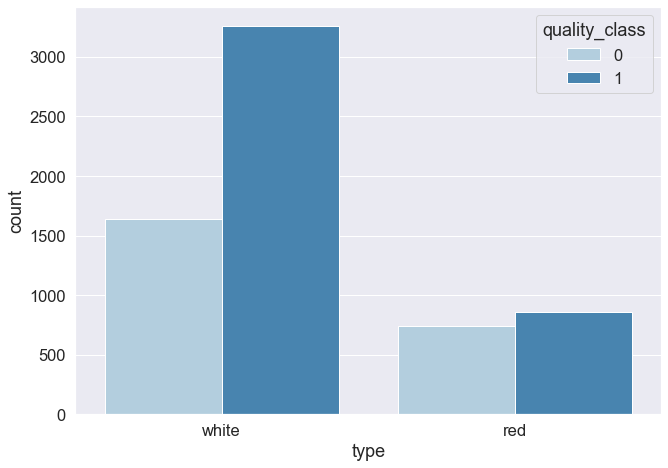

In [144]:
plt.figure(figsize=(10.5,7.5))
sns.countplot(x='type',hue='quality_class', data = df_mean, palette="Blues")

- Quality gap in White Wine is much vast in comparison to Red Wines<br>

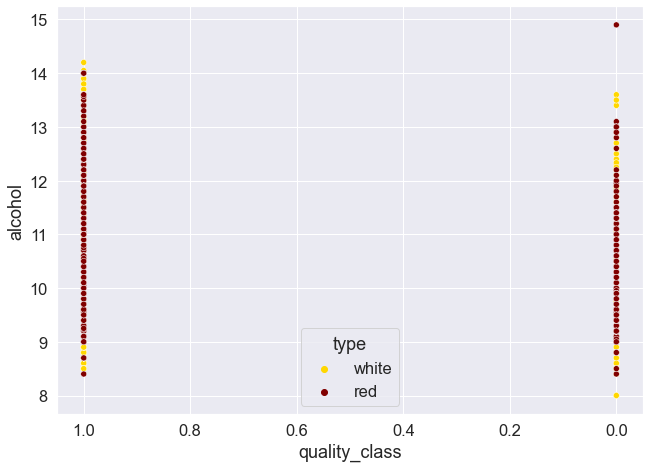

In [145]:
plt.figure(figsize=(10.5,7.5))
sns.scatterplot(x="quality_class",y='alcohol', data=df_mean, hue="type", palette = ['gold','maroon'])
plt.gca().invert_xaxis()
plt.show()

### Outlier Overview

In [146]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  quality_class         6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


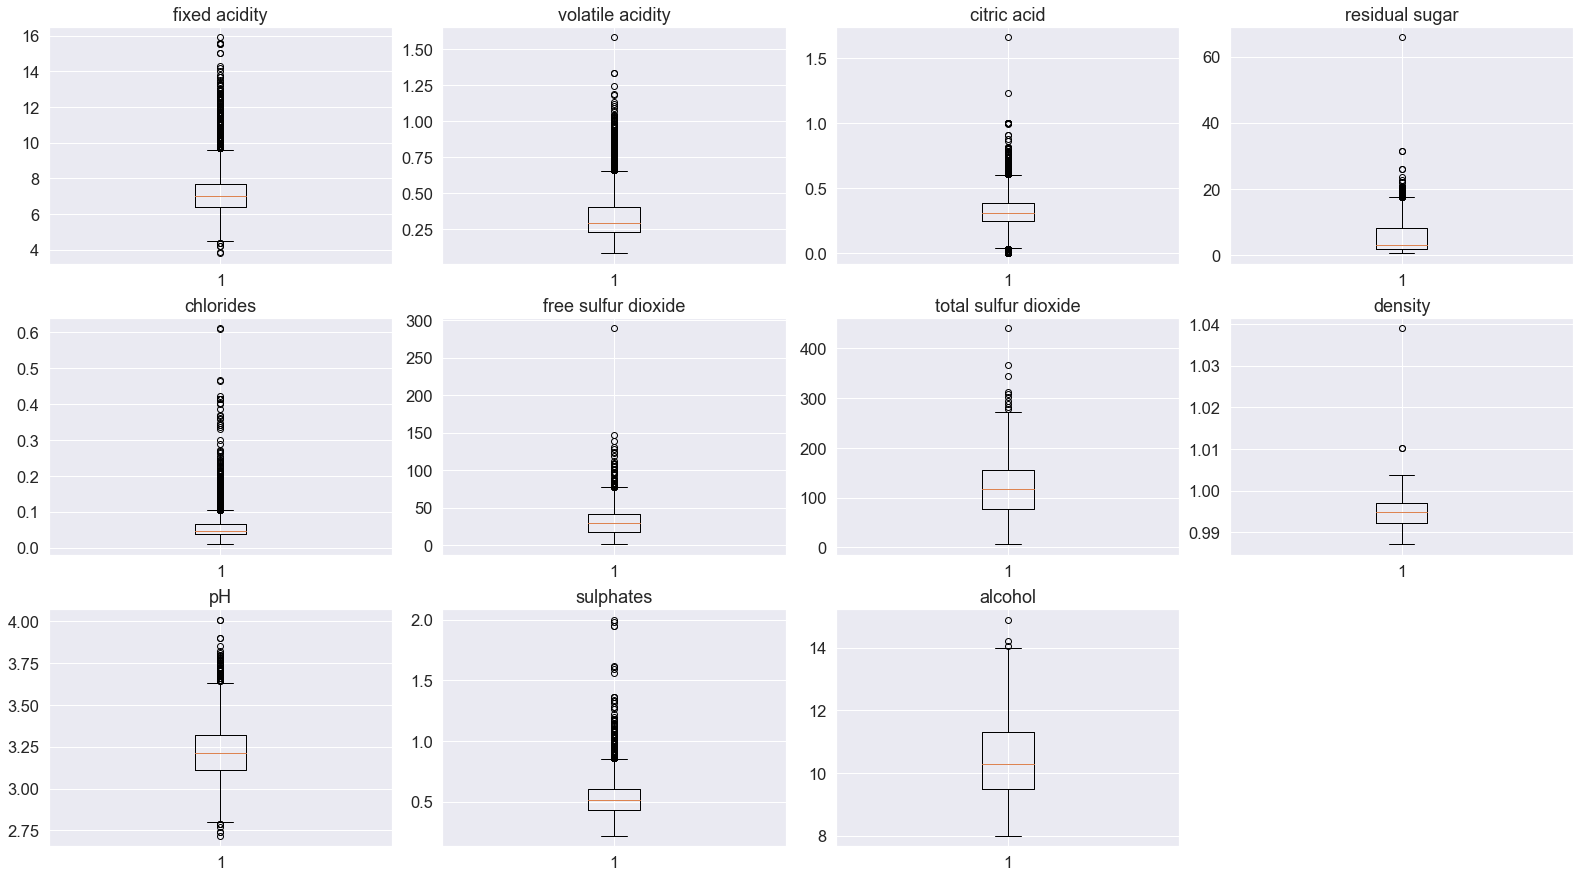

In [147]:
outliers_by_12_variables = ['fixed acidity', 'volatile acidity', 'citric acid',
                            'residual sugar', 'chlorides', 'free sulfur dioxide',
                            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5, 4, i+1)
    plt.tight_layout(pad=0.5)
    plt.boxplot(df_mean[outliers_by_12_variables[i]])
    plt.title(outliers_by_12_variables[i])

### Logistic Regression Theory

- <b> What is Logistic Regression? </b> <br>
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. <br> 
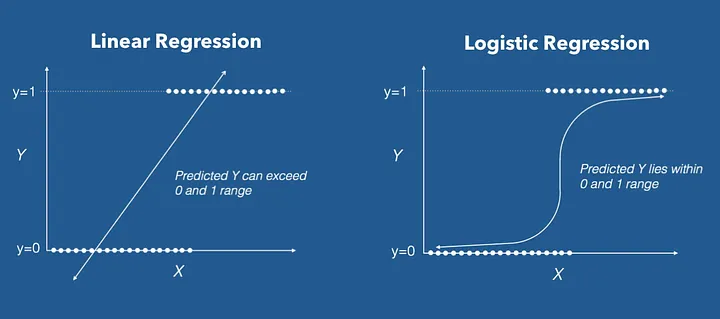 <br>

- <b>What is the Sigmoid Function?</b>
In order to map predicted values to probabilities, we use the Sigmoid function.<br>
The function maps any real value into another value between 0 and 1.<br>
In machine learning, we use sigmoid to map predictions to probabilities.<br>
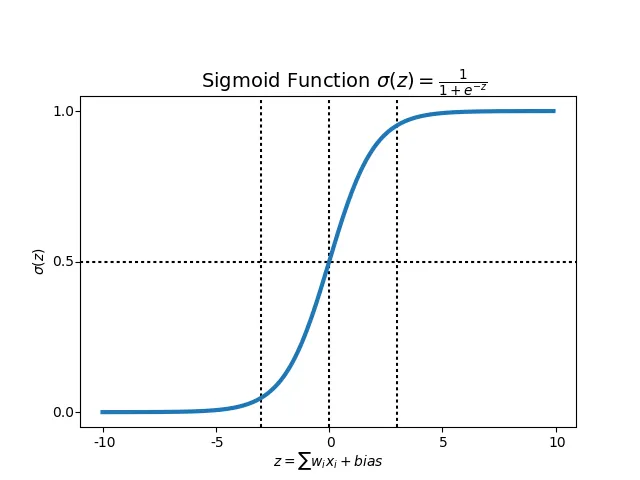 <br>
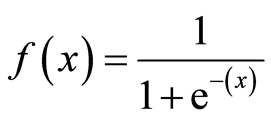 <br>

Reference: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148 <br>




- <b> Logistic Regression Evaluation Metrics </b><br><br>
Logistic regression is a classification algorithm used for binary and multiclass classification problems. There are several evaluation metrics that can be used to evaluate the performance of a logistic regression model, including: <br>
<b>Confusion Matrix: </b> A confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model. <br>
<b>F1 Score:</b>The F1 score is the harmonic mean of precision and recall. It is a single metric that balances both precision and recall, and is useful when the goal is to achieve a balance between these two metrics. <br>
<b>ROC Curve:</b> The ROC curve (Receiver Operating Characteristic curve) is a graphical representation of the performance of a binary classifier. <br> It plots the true positive rate against the false positive rate at different classification thresholds. <br> The ROC curve can be used to choose the best threshold for a binary classifier and to compare the performance of different models. <br>
<b>AUC (Area Under the Curve):</b> The AUC (Area Under the Curve) is the area under the ROC curve.<br> It is a single metric that summarizes the performance of a binary classifier.<br> AUC ranges between 0 and 1, with a value of 1 indicating perfect classification and a value of 0.5 indicating random classification.<br>




### Implementation

#### Mapping Red and White wine to 0s and 1s

In [148]:
df_mean.type = df_mean.type.map({'red':0, 'white':1})

#### Creating Training and Testing Groups

In [149]:
df_mean.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  quality_class  
0       0.45      8.8        6              1  
1       0.49      9.5        6              1  
2       0.44     10.1        6              1  
3       0.40      9.9        6              1  
4       0.40      9.9        6              1

In [150]:
X = df_mean[['type', 'alcohol', 'density', 'volatile acidity', 'chlorides',
       'citric acid', 'fixed acidity', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'residual sugar', 'pH']]
y = df_mean['quality_class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

y_test


369     0
6243    1
3374    0
1009    1
220     0
       ..
1757    0
5699    0
3875    1
5584    0
884     1
Name: quality_class, Length: 1300, dtype: int64

#### Setting and Fitting the model

In [151]:
log = LogisticRegression(random_state=40)
log.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [152]:
train_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.73
Accuracy in Test  Group   : 0.73


### Confusion Matrix

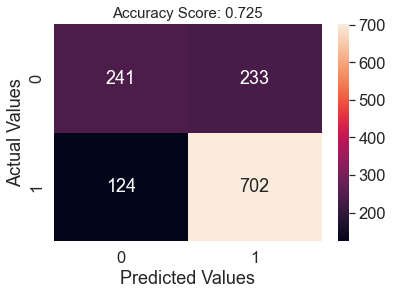

In [153]:
pred = log.predict(X_test)
score = round(accuracy_score(y_test,pred),3)
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [154]:
pred_test  = log.predict(X_test)
pred_train = log.predict(X_train)

### Performance Measure

In [155]:
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(random_state=40)

In [156]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[1033  877]
 [ 518 2769]]
Confusion Matrix Test Data
----------------------------------------
[[241 233]
 [124 702]]


In [157]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 241
(Total) True Positive       : 702
(Total) Negative Positive   : 233
(Total) Negative Negative   : 124


### Accuracy score

In [158]:
from sklearn.metrics import accuracy_score
accuracy = quality_pred.score(X_test, y_test)

print("Accuracy Score of Our Model     : ",  accuracy)

Accuracy Score of Our Model     :  0.7253846153846154


### Error Rate

In [159]:
error_rate = 1 - accuracy
print("Error Rate of Our Model     : ", error_rate)

Error Rate of Our Model     :  0.2746153846153846


### Precision
- <b> Precision = TP/(TP+FP) </b>

In [160]:
from sklearn.metrics import precision_score

print("Precision         : ",  precision_score(y_test, pred_test, average='micro'))

Precision         :  0.7253846153846154


### Recall 
- <b> Recall = TP/(TP+FN) </b>

In [161]:
from sklearn.metrics import recall_score

print("Recall            : ",  recall_score(y_test, pred_test, average='micro'))

Recall            :  0.7253846153846154


### Specificity 
- <b> Specificity = TN/(TN+FP) </b>

In [162]:
print(" Specificity    : ",  (TN)/(TN + FP)) 


 Specificity    :  0.5084388185654009


### F1 Score
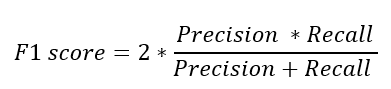

In [163]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred_test, average='micro')
print("F1 Score     : ",  f1)

F1 Score     :  0.7253846153846153


### Classification Report

In [164]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test))

print("Accuracy Score of Our Model     : ",  accuracy)
print("Error Rate of Our Model         : ", error_rate)

print("Precision                       : ", precision_score(y_test, pred_test, average='micro' ))
print("Recall                          : ",  recall_score(y_test, pred_test, average='micro'))
print("Specificity                     : ",  (TN)/(TN + FP)) 

print("F1 Score                        : ",  f1)

              precision    recall  f1-score   support

           0       0.66      0.51      0.57       474
           1       0.75      0.85      0.80       826

    accuracy                           0.73      1300
   macro avg       0.71      0.68      0.69      1300
weighted avg       0.72      0.73      0.72      1300

Accuracy Score of Our Model     :  0.7253846153846154
Error Rate of Our Model         :  0.2746153846153846
Precision                       :  0.7253846153846154
Recall                          :  0.7253846153846154
Specificity                     :  0.5084388185654009
F1 Score                        :  0.7253846153846153


### ROC/AUC

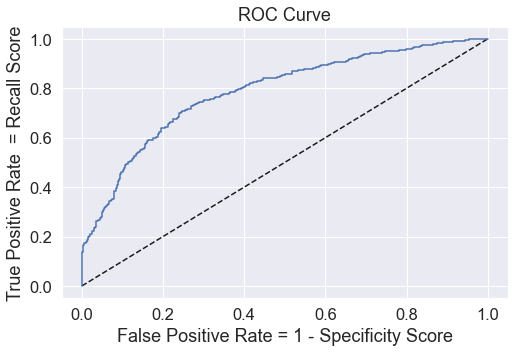

In [165]:
probs = quality_pred.predict_proba(X_test)[:,1]  #Predict probabilities for the test data

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs) #Get the ROC Curve


import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [166]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values: 
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

C Value  Accuracy Train  Accuracy Test
0     0.001        0.681547       0.671538
1     0.010        0.697325       0.674615
2     0.100        0.728305       0.713077
3     1.000        0.731576       0.725385
4    10.000        0.739850       0.733846
5   100.000        0.741774       0.735385
6  1000.000        0.739850       0.733077